In [48]:
# libs para processamento
import geopandas as gpd
import cartopy.crs as ccrs

from hidromet.utils import dir_projeto
from shapely.geometry import Point
import json
from hidromet import modelos
import matplotlib.pyplot as plt

diretorio = dir_projeto()

contornos = diretorio.joinpath("contornos", "contornos_smap.shp")
dir_series_concatenadas = diretorio.joinpath("arquivos", "series-concatenadas")

In [8]:
info_bacias = list(dir_series_concatenadas.glob("*.json"))

In [45]:
gdfs_bacias = list()
for arquivo_bacia in info_bacias:
    dados = open(arquivo_bacia)
    json_bacia = json.load(dados)
    nome_bacia = (arquivo_bacia.stem).replace("log_", "")
    dict_bacia = dict()
    for posto in json_bacia:
        coords = Point(posto["longitude"], posto["latitude"])
        dict_bacia.update({posto["codigo"]: coords})

    gdf_bacia = gpd.GeoDataFrame.from_dict(dict_bacia, orient="index")
    gdf_bacia.columns = [nome_bacia]

    gdfs_bacias.append(gdf_bacia)

In [46]:
gdf_contornos = gpd.read_file(contornos)
crs = gdf_contornos.crs

In [ ]:

    
def add_mapa_demarcado(fig, 
                       latitude: List[int], 
                       longitude: List[int], 
                       zoom: List[int] = [-90, -20, -60, 15], 
                       projecao = ccrs.PlateCarree(),
                       posicao: List[float] = [0.96, 0.1, 0.2, 0.65],
                      ):
    """
    Adiciona um mapa contendo um retângulo de demarcação ao gráfico.
    
    Parameters
    ----------
    fig : 
        Figura.
        
    zoom : List[int]
        Zoom do mapa. Por default, América do Sul.
        
    projecao: 
        Projeção do mapa.
        
    longitude : List[int]
        Limites de longitude do retângulo.
        
    latitude : List[int]
        Limites de longitude do retângulo.
        
    posicao : List[int]
        Posição do mapa na figura.
            
    Returns
    -------
    
        Subplot do mapa demarcado.
    """
    ax = fig.add_axes(posicao, projection=projecao) 
    ax.stock_img()
    
    ax.set_extent(zoom, crs=projecao) # (x0, x1, y0, y1)
    
    return ax 

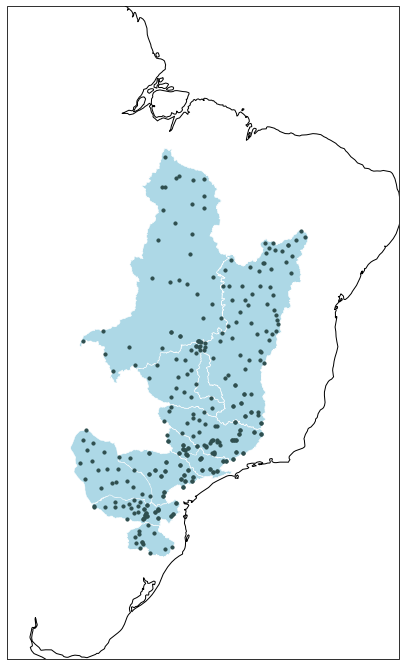

In [83]:
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection=ccrs.PlateCarree()))


#ax.stock_img()
ax.set_extent([-60, -35, -35, 5], crs=ccrs.PlateCarree()) # (x0, x1, y0, y1)
ax.coastlines()

gdf_contornos.geometry.plot(ax=ax, facecolor="lightblue", edgecolor="white", lw=0.5)

for gdf in gdfs_bacias:
    coordenadas = gdf.iloc[:, 0].values.tolist()
    xs = [point.x for point in coordenadas]
    ys = [point.y for point in coordenadas]
    ax.scatter(xs, ys, 10, color='darkslategray')
    # or plt.plot(xs, ys) if 
#    gdf.iloc[:, 0].plot(ax=ax)